# Detecting Anomaly in ECG Data Using AutoEncoder with PyTorch

### Introduction

The project "Detecting Anomaly in ECG Data Using AutoEncoder with PyTorch" is designed to revolutionize cardiac health monitoring by integrating advanced anomaly detection directly into patient care models. This initiative seeks to harness the power of machine learning, specifically using PyTorch, to analyze electrocardiogram (ECG) data in real-time. The project's goal is to create a system that not only tracks heart activity but also instantly alerts patients and healthcare providers of any irregularities, facilitating immediate intervention.

### Problem Statement

Cardiovascular diseases remain a leading cause of death worldwide, and early detection is crucial for effective management and treatment. Current ECG analysis methods, primarily manual and conducted in clinical settings, often lead to delays in identifying cardiac anomalies. These delays can be detrimental, especially in acute cases where every moment counts. The project addresses the need for a real-time, automated, and reliable solution that empowers patients with immediate feedback on their cardiac health, potentially saving lives through timely alerts.

### Development Method

The development of this patient-centric ECG monitoring system involves the following key steps:

1. **Data Preparation and Preprocessing**: ECG data is meticulously prepared and preprocessed for model training. This involves normalizing the data, segmenting it into readable sequences, and ensuring that it is free from noise and artifacts that could affect model accuracy.

2. **Model Architecture - Autoencoder LSTM**: The project employs an Autoencoder LSTM network architecture, realized through the PyTorch framework. This architecture is chosen for its ability to learn complex temporal patterns in ECG data. The LSTM autoencoder comprises an encoding stage to compress the input data into a condensed representation and a decoding stage to reconstruct the data from this representation.

3. **Training with Normal ECG Data**: The model is trained exclusively on datasets of normal ECG readings. This approach enables the model to learn a baseline of what constitutes a normal heart rhythm.

4. **Real-time Anomaly Detection and Alert System**: The trained model continuously analyzes incoming ECG data. The focus is on the reconstruction error: significant deviations from the learned normal patterns are flagged as anomalies. When anomalies are detected, the system immediately triggers alerts to the patient and healthcare providers, enabling swift medical response.

This proactive, real-time monitoring and alert system represents a significant leap in patient-centered cardiac care, potentially reducing the risk of late detection in cardiac events.

### Import required libraries

In [1]:
# Importing necessary libraries for TensorFlow, pandas, numpy, and matplotlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# Importing the PyTorch library
import torch

# Importing additional libraries for data manipulation, visualization, and machine learning
import copy
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split

# Importing PyTorch modules for neural network implementation
from torch import nn, optim
import torch.nn.functional as F
import torch.nn as nn

# Ignoring warnings to enhance code cleanliness
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis and Visualization of ECG Data in Python"




The code in this section provides a comprehensive exploratory analysis and visualization of electrocardiogram (ECG) data using Python's pandas and matplotlib libraries. The code follows a structured approach to understand and represent ECG data characteristics effectively.

1. **Data Loading and Initial Exploration**: The script begins by importing the ECG dataset from a TensorFlow-hosted URL using `pandas`. It displays the first few rows of the dataset using `df.head().T` for a transposed view, giving a quick insight into the data structure and initial values.

2. **Statistical Summary**: `df.describe()` is used to generate a statistical summary of the dataset, providing key insights such as mean, standard deviation, and range for each column, which are essential for understanding the data distribution.

3. **Null Value Check**: The code checks for missing values with `df.isna().sum()`, ensuring data integrity and the need for any preprocessing like imputation.

4. **Data Type Verification**: `df.dtypes` is employed to verify the data types of each column, a crucial step in data preprocessing to ensure appropriate handling of different data types.

5. **Target Column Renaming and Analysis**: The script renames the last column to 'target' for clarity and uses `df.target.value_counts()` to analyze the distribution of target classes in the dataset. This step is critical in understanding the balance between different classes.

6. **Visualization of Target Distribution**: A bar plot is created to visualize the value counts of the target column. This visual representation, enhanced with count values displayed on each bar, aids in identifying any class imbalances that might exist in the dataset.

7. **ECG Data Visualization for Each Class**: The code defines a function `plot_ecg` to plot ECG data, applying a moving average for smoothing and creating a confidence interval around the smoothed data. The plotting setup iterates over each unique class in the 'target' column, visualizing the average ECG data for each class in a subplot. This comprehensive visualization helps in understanding the differences in ECG patterns across different classes.

8. **Final Visualization Layout Adjustment**: The script concludes by adjusting the layout for better readability and removing any extra axes, ensuring a clean and informative visualization output.



In [3]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv',header=None)
df.head().T

,0,1,2,3,4
0,-0.112522,-1.100878,-0.567088,0.490473,0.800232
1,-2.827204,-3.996840,-2.593450,-1.914407,-0.874252
2,-3.773897,-4.285843,-3.874230,-3.616364,-2.384761
3,-4.349751,-4.506579,-4.584095,-4.318823,-3.973292
4,-4.376041,-4.022377,-4.187449,-4.268016,-4.338224
...,...,...,...,...,...
136,0.228077,0.476333,-0.532197,0.990133,0.960304
137,0.123431,0.773820,0.321097,1.086798,0.971020
138,0.925286,1.119621,0.904227,1.403011,1.614392
139,0.193137,-1.436250,-0.421797,-0.383564,1.421456


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [5]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
136    0
137    0
138    0
139    0
140    0
Length: 141, dtype: int64

In [7]:
df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
136    float64
137    float64
138    float64
139    float64
140    float64
Length: 141, dtype: object

In [8]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns

In [9]:
df.target.value_counts()

1.0    2919
0.0    2079
Name: target, dtype: int64

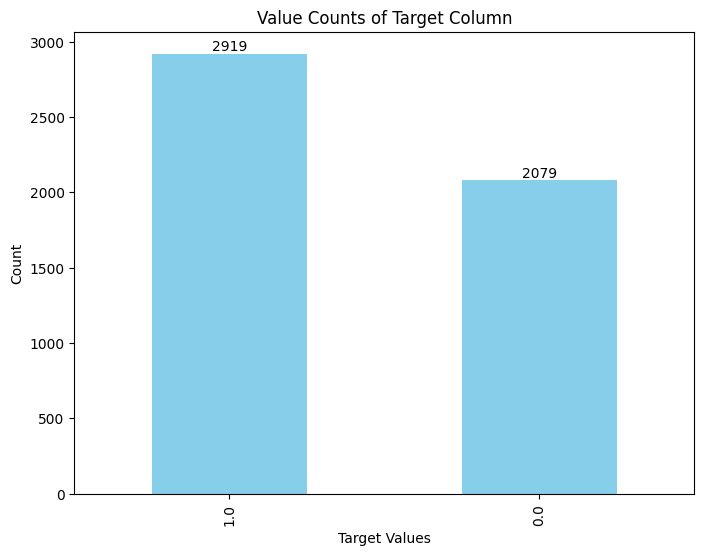

In [10]:
value_counts = df['target'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Target Column')
plt.xlabel('Target Values')
plt.ylabel('Count')

# Display the count values on top of the bars
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [34]:
classes = df.target.unique()

def plot_ecg(data, class_name, ax, n_steps=10):
    # Convert data to a DataFrame
    time_series_df = pd.DataFrame(data)

    # Apply a moving average for smoothing
    smooth_data = time_series_df.rolling(window=n_steps, min_periods=1).mean()

    # Calculate upper and lower bounds for confidence interval
    deviation = time_series_df.rolling(window=n_steps, min_periods=1).std()
    upper_bound = smooth_data + deviation
    lower_bound = smooth_data - deviation

    # Plot the smoothed data
    ax.plot(smooth_data, color='black', linewidth=2)

    # Plot the confidence interval
    ax.fill_between(time_series_df.index, lower_bound[0], upper_bound[0], color='black', alpha=0.2)

    # Set the title
    ax.set_title(class_name)

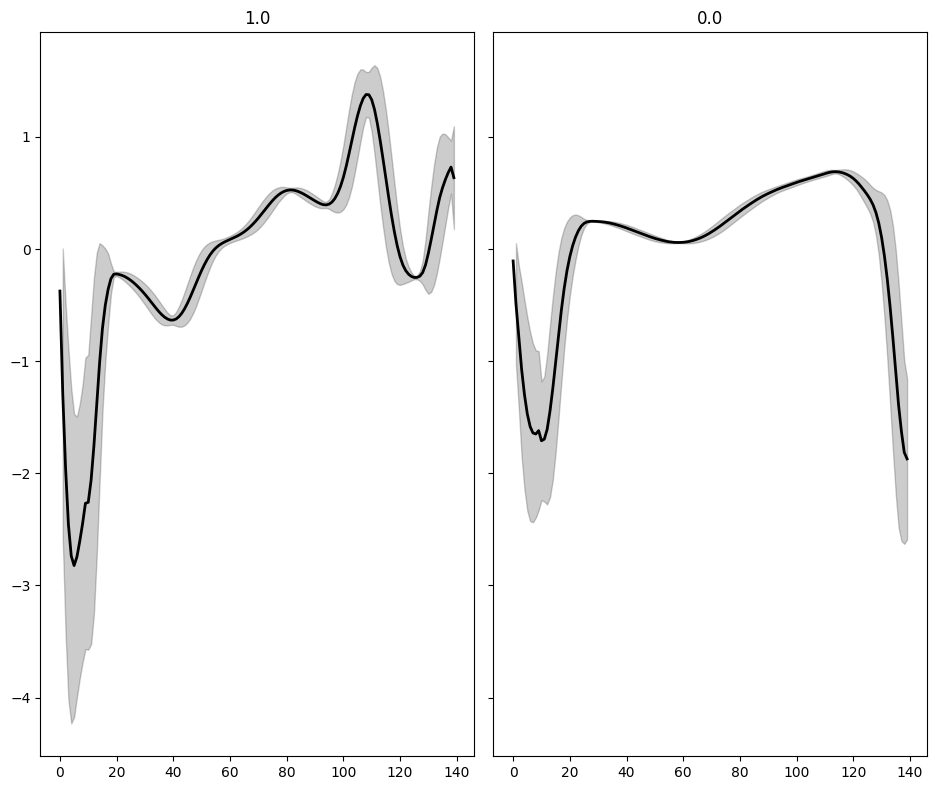

In [35]:
# Plotting setup
fig, axs = plt.subplots(
    nrows=len(classes) // 3 + 1,
    ncols=3,
    sharey=True,
    figsize=(14, 8)
)

# Plot for each class
for i, cls in enumerate(classes):
    ax = axs.flat[i]
    data = df[df.target == cls].drop(labels='target', axis=1).mean(axis=0).to_numpy()
    plot_ecg(data, cls, ax)  # Using 'cls' directly as class name

# Adjust layout and remove extra axes
fig.delaxes(axs.flat[-1])
fig.tight_layout()

plt.show()

### Preparation and Splitting of ECG Data for Anomaly Detection Using PyTorch


The code in this section outlines the methodical process of preparing and splitting an Electrocardiogram (ECG) dataset for the purpose of anomaly detection in a PyTorch environment. The primary goal is to segregate the dataset into distinct categories for training, validation, and testing, focusing on both normal and anomalous ECG readings.

1. **Data Segregation into Normal and Anomalous Groups**:
    - `normal_df` is created by filtering the ECG dataset to include only the data points where the target value indicates a normal reading. This subset excludes the 'target' column.
    - `anomaly_df` is similarly created by filtering for anomalous readings (where the target value does not indicate normal).

2. **Initial Train-Validation Split**:
    - The 'normal_df' dataset, which includes only normal readings, is split into training and validation sets. This is done using a 15% allocation for the validation set, ensuring that the majority of normal data is used for training. The use of `random_state=42` ensures that the split is reproducible.

3. **Splitting Validation Set for Test Data**:
    - The previously obtained validation set is further divided to create a test set. Here, 30% of the validation set is allocated for testing. This step ensures that there is a separate test dataset to evaluate the model's performance.

4. **Function to Create PyTorch Dataset**:
    - The `create_dataset` function converts a given DataFrame into a format suitable for PyTorch modeling. This includes converting the DataFrame into a list of sequences (each sequence being a list of floats), transforming these sequences into PyTorch tensors, and determining the dataset's dimensions in terms of sequence length and number of features.

5. **Dataset Creation for Different Sets**:
    - Using the `create_dataset` function, distinct datasets are created for training, validation, normal test cases, and anomalous test cases. This includes capturing the sequence length and number of features from the training dataset for use in model architecture.

This comprehensive preparatory process is crucial for the subsequent stages of model training and evaluation in detecting anomalies in ECG data.

In [36]:
normal_df = df[df.target == 1].drop(labels='target', axis=1)
normal_df.shape

(2919, 140)

In [37]:
anomaly_df = df[df.target != 1].drop(labels='target', axis=1)
anomaly_df.shape

(2079, 140)

In [134]:
# Splitting the Dataset

# Initial Train-Validation Split:
# The dataset 'normal_df' is divided into training and validation sets.
# 15% of the data is allocated to the validation set.
# The use of 'random_state=42' ensures reproducibility.

train_df, val_df = train_test_split(
  normal_df,
  test_size=0.15,
  random_state=42
)

# Further Splitting for Validation and Test:
# The validation set obtained in the previous step is further split into validation and test sets.
# 33% of the validation set is allocated to the test set.
# The same 'random_state=42' is used for consistency in randomization.

val_df, test_df = train_test_split(
  val_df,
  test_size=0.30,
  random_state=42
)

In [39]:
# Function to Create a Dataset
def create_dataset(df):
    # Convert DataFrame to a list of sequences, each represented as a list of floats
    sequences = df.astype(np.float32).to_numpy().tolist()

    # Convert sequences to PyTorch tensors, each with shape (sequence_length, 1, num_features)
    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]

    # Extract dimensions of the dataset
    n_seq, seq_len, n_features = torch.stack(dataset).shape

    # Return the dataset, sequence length, and number of features
    return dataset, seq_len, n_features

In [40]:
# Create the training dataset from train_df
train_dataset, seq_len, n_features = create_dataset(train_df)

# Create the validation dataset from val_df
val_dataset, _, _ = create_dataset(val_df)

# Create the test dataset for normal cases from test_df
test_normal_dataset, _, _ = create_dataset(test_df)

# Create the test dataset for anomalous cases from anomaly_df
test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

### Implementation of LSTM-Based Autoencoder for ECG Anomaly Detection in PyTorch

The code in this section is an implementation of an LSTM-based Autoencoder neural network in PyTorch, specifically designed for the task of anomaly detection in ECG data. The Autoencoder is composed of two primary components: the Encoder and the Decoder, each defined as a subclass of `nn.Module`.

1. **Encoder Class**:
    - **Purpose**: To compress the input ECG sequence into a lower-dimensional representation.
    - **Architecture**: Comprises two LSTM layers. The first LSTM layer takes the original ECG features as input and outputs to the second LSTM layer, which further compresses the information to an embedding dimension.
    - **Parameters**: Accepts sequence length, number of features, and an optional embedding dimension (default set to 64).
    - **Forward Method**: Defines the data flow through the encoder, reshaping and passing the input through the LSTM layers to produce the encoded representation.

2. **Decoder Class**:
    - **Purpose**: To reconstruct the ECG sequence from the encoded representation.
    - **Architecture**: Mirrors the encoder with two LSTM layers, followed by a linear output layer to generate the reconstructed ECG sequence.
    - **Parameters**: Accepts sequence length, input dimension (matching the encoder's embedding dimension), and number of features.
    - **Forward Method**: Outlines the process of repeating the encoded representation, passing it through the LSTM layers, and finally through the output layer to reconstruct the data.

3. **Autoencoder Class**:
    - **Integration of Encoder and Decoder**: This class combines the Encoder and Decoder into a single model. It initializes both components with the given sequence length, number of features, and embedding dimension.
    - **Forward Method**: Describes the complete forward pass of the Autoencoder, encoding the input and then decoding it to produce the reconstructed output.

4. **Model Initialization and Device Assignment**:
    - The Autoencoder model is instantiated with specified sequence length, number of features, and an embedding dimension of 128.
    - The code dynamically assigns the model to run on GPU if available (`cuda`), otherwise on CPU (`cpu`), optimizing computational efficiency.

This implementation leverages the sequential data processing capability of LSTM networks, making it highly suitable for time-series data like ECG. By learning to reconstruct normal ECG sequences, the model can subsequently identify anomalies by detecting significant deviations in the reconstruction of new data, thus serving as an effective tool for real-time anomaly detection in cardiac monitoring.

In [102]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )

  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))

    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))

In [103]:
class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)

In [104]:
class Autoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Autoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [105]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(seq_len, n_features, 128)
model = model.to(device)

In [106]:
device

device(type='cuda')

### Training and Visualization of ECG Autoencoder Model in PyTorch

The code in this section outlines the training an Autoencoder model in PyTorch for ECG anomaly detection, along with detailed visualization of the training progress and model performance.

1. **Function for Plotting Input and Reconstruction**:
    - `plot_input_reconstruction` takes the trained model, a dataset, and the epoch number as inputs.
    - It compares the original input ECG sequence with the reconstructed sequence from the model, displaying them on a plot.
    - This function helps in visually assessing how well the model is reconstructing the input data at different stages of training, with the input sequence in black and the reconstruction in red.

2. **Training Function for the Autoencoder Model**:
    - `train_model` is responsible for training the Autoencoder model using the training and validation datasets over a specified number of epochs.
    - The model uses the Adam optimizer and L1 loss function. The loss is calculated between the reconstructed and the original sequences.
    - The function saves the model weights when a lower validation loss is observed, indicating an improvement in the model's performance.
    - It also maintains a history of training and validation losses for analysis.

3. **Training Process and Intermediate Visualization**:
    - During training, for each epoch, the model's performance on both training and validation datasets is recorded.
    - The `plot_input_reconstruction` function is called at the first epoch and then every 5 epochs to visualize the model's current reconstruction capability.
    - The model is set to evaluation mode (`model.eval()`) for validation and visualization steps to ensure dropout layers, batch normalization, etc., are appropriately adjusted.

4. **Final Visualization of Training and Validation Loss**:
    - Post-training, a plot is generated to illustrate the loss over epochs for both training and validation datasets. This plot is critical for understanding the model's learning curve and for identifying issues like overfitting or underfitting.
    - The training loss is plotted in black, while the validation loss is in red, providing a clear visual contrast for easy comparison.

In [107]:
def plot_input_reconstruction(model, dataset, epoch):
    model = model.eval()

    plt.figure(figsize=(10, 5))

    # Take the first sequence from the dataset
    seq_true = dataset[0].to(device)
    seq_pred = model(seq_true)

    with torch.no_grad():
        # Squeeze the sequences to ensure they are 1-dimensional
        input_sequence = seq_true.squeeze().cpu().numpy()
        reconstruction_sequence = seq_pred.squeeze().cpu().numpy()

        # Check the shape after squeezing
        if input_sequence.ndim != 1 or reconstruction_sequence.ndim != 1:
            raise ValueError("Input and reconstruction sequences must be 1-dimensional after squeezing.")

        # Plotting the sequences
        plt.plot(input_sequence, label='Input Sequence', color='black')
        plt.plot(reconstruction_sequence, label='Reconstruction Sequence', color='red')
        plt.fill_between(range(len(input_sequence)), input_sequence, reconstruction_sequence, color='gray', alpha=0.5)

        plt.title(f'Input vs Reconstruction - Epoch {epoch}')
        plt.legend()
        plt.show()



import torch
import numpy as np
import copy

def train_model(model, train_dataset, val_dataset, n_epochs, save_path):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.L1Loss(reduction='sum').to(device)
    history = {'train': [], 'val': []}

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    for epoch in range(1, n_epochs + 1):
        model.train()

        train_losses = []
        for seq_true in train_dataset:
            optimizer.zero_grad()

            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        val_losses = []
        model.eval()
        with torch.no_grad():
            for seq_true in val_dataset:
                seq_true = seq_true.to(device)
                seq_pred = model(seq_true)

                loss = criterion(seq_pred, seq_true)
                val_losses.append(loss.item())

        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)

        history['train'].append(train_loss)
        history['val'].append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            # Save the best model weights
            print("Saving best model")
            torch.save(model.state_dict(), save_path)

        print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

        if epoch == 1 or epoch % 5 == 0:
            plot_input_reconstruction(model, val_dataset, epoch)

    # Load the best model weights before returning
    model.load_state_dict(best_model_wts)
    return model.eval(), history

Saving best model
Epoch 1: train loss 66.66330116268898 val loss 53.24942888253378


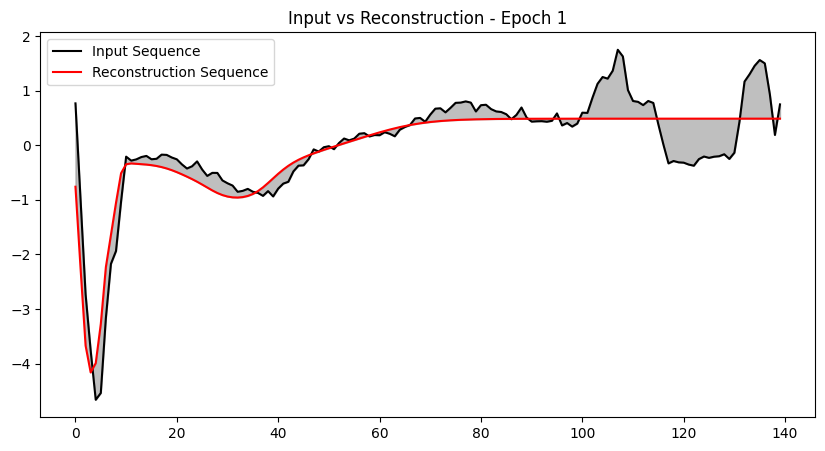

Saving best model
Epoch 2: train loss 51.84858479820783 val loss 50.80988956230085
Saving best model
Epoch 3: train loss 48.17946220683936 val loss 46.98173326355605
Epoch 4: train loss 54.79823315830684 val loss 53.576677120586304
Epoch 5: train loss 51.62434697103135 val loss 48.9084326968665


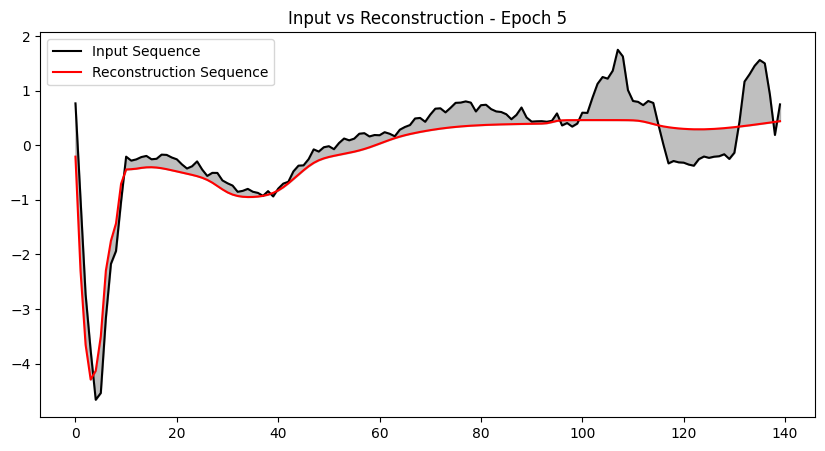

Epoch 6: train loss 44.71368753847601 val loss 48.31740213335578
Saving best model
Epoch 7: train loss 37.94816154570697 val loss 30.450780718806662
Saving best model
Epoch 8: train loss 29.953840821176613 val loss 27.428095088477022
Epoch 9: train loss 27.759982476932105 val loss 27.934764351047345
Saving best model
Epoch 10: train loss 27.25183110312078 val loss 26.899038093488777


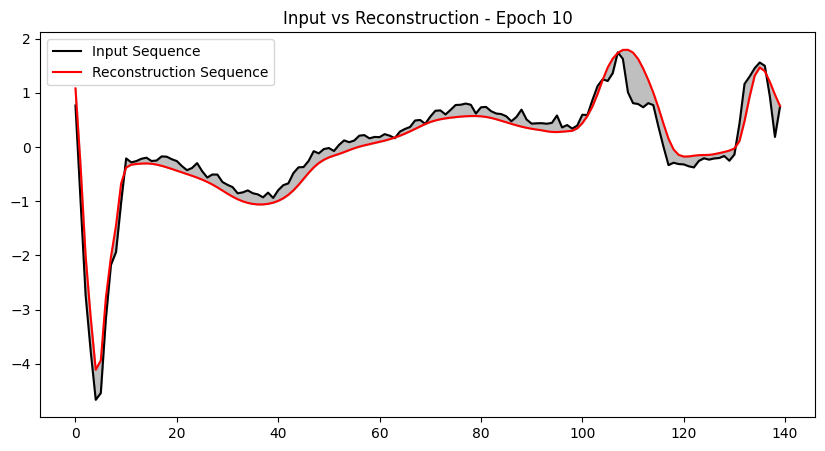

Saving best model
Epoch 11: train loss 25.97174817676844 val loss 25.863368516082243
Epoch 12: train loss 25.05175857474755 val loss 25.94760464808233
Saving best model
Epoch 13: train loss 24.256306974986828 val loss 22.361492423881035
Epoch 14: train loss 24.005349307231295 val loss 26.26070018026202
Saving best model
Epoch 15: train loss 23.504503602608708 val loss 22.246880280686728


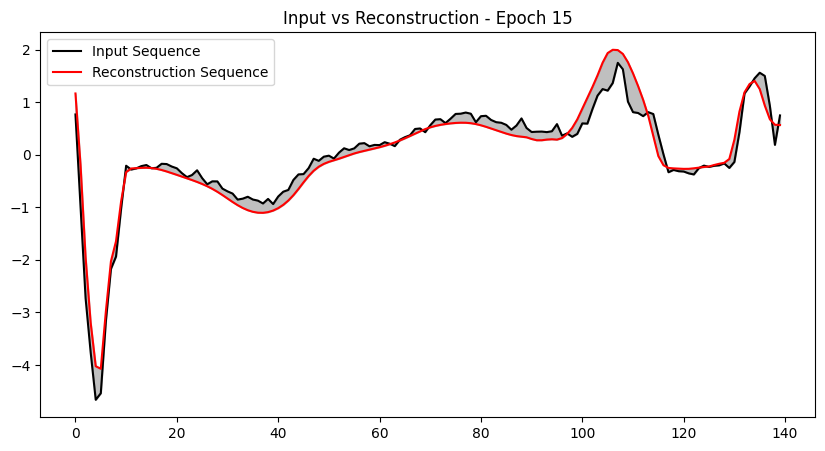

Saving best model
Epoch 16: train loss 23.288513090955494 val loss 20.68181828834091
Epoch 17: train loss 22.72269574118833 val loss 21.50823101004643
Epoch 18: train loss 22.27640482515445 val loss 21.035715620672338
Epoch 19: train loss 21.72372969789209 val loss 20.764090095363787
Epoch 20: train loss 21.211963441572763 val loss 24.815379217623036


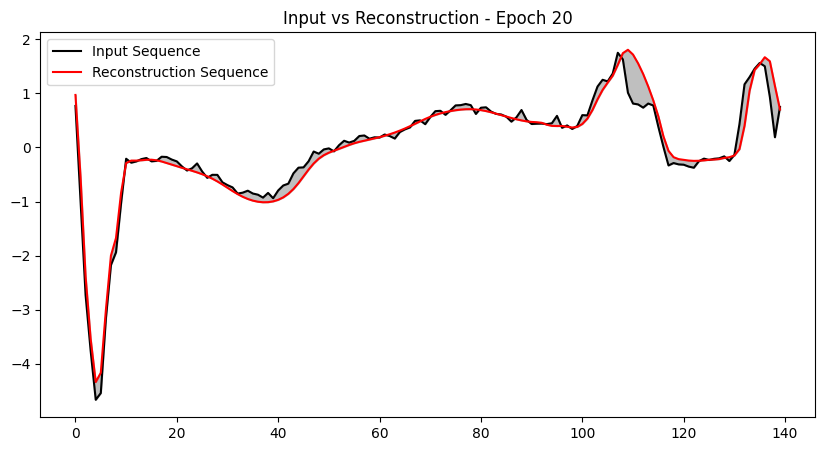

Epoch 21: train loss 20.79138134007298 val loss 20.76609022706849
Epoch 22: train loss 26.083809429385497 val loss 21.202684412230404
Epoch 23: train loss 20.421263078584253 val loss 20.82562715120283
Saving best model
Epoch 24: train loss 19.338261123820207 val loss 20.446958234285738
Saving best model
Epoch 25: train loss 19.571354190076086 val loss 18.351093598193277


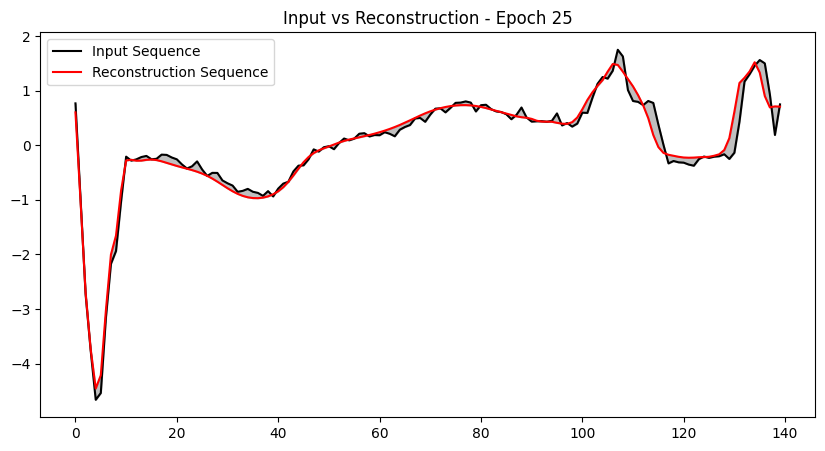

Epoch 26: train loss 19.273063843406913 val loss 22.40243576817952
Epoch 27: train loss 18.839911718226304 val loss 20.14472087170077
Saving best model
Epoch 28: train loss 18.203765914498774 val loss 17.31773777138251
Epoch 29: train loss 18.0555351905792 val loss 17.45236981037127
Epoch 30: train loss 17.563393044308373 val loss 21.079814103683105


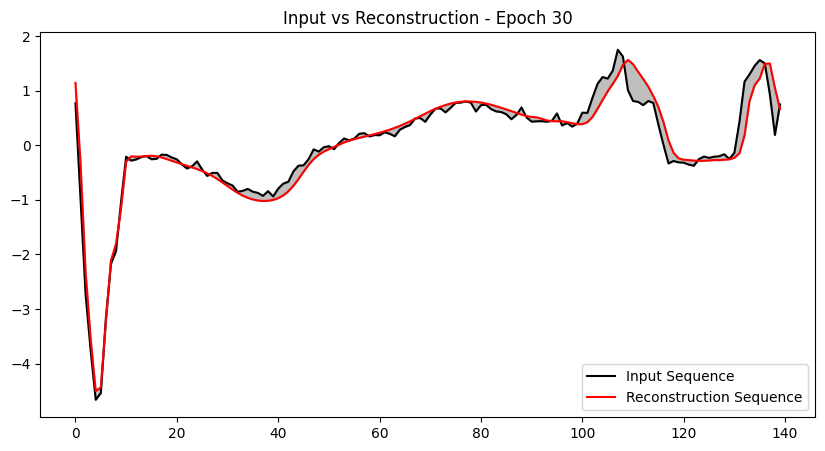

Epoch 31: train loss 17.21931287599446 val loss 18.407605067048056
Saving best model
Epoch 32: train loss 16.951557253215256 val loss 15.869836621723891
Epoch 33: train loss 16.669079112891275 val loss 20.952453278030553
Epoch 34: train loss 16.643958528596325 val loss 24.272850938217633
Saving best model
Epoch 35: train loss 15.956029030355126 val loss 15.34830890011055


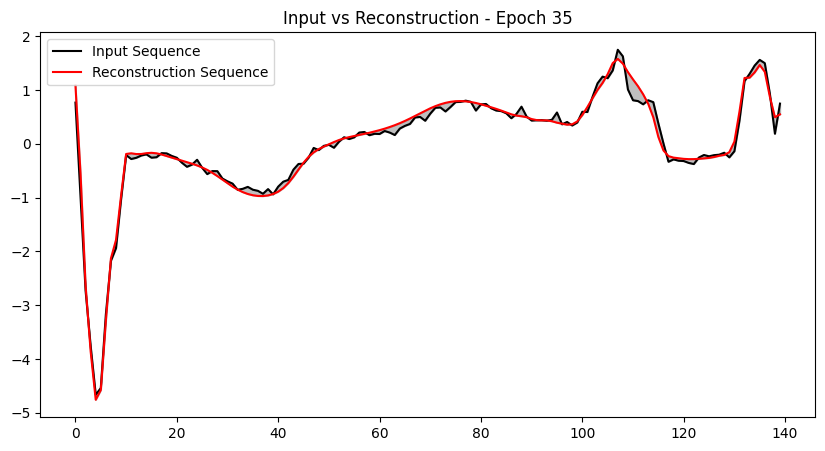

Epoch 36: train loss 15.929330813312953 val loss 15.489145557221292
Epoch 37: train loss 15.573984329280522 val loss 16.477276113659855
Epoch 38: train loss 15.797818518895768 val loss 17.999094370689
Epoch 39: train loss 15.48177461689492 val loss 18.188871953267693
Epoch 40: train loss 15.131379762132145 val loss 16.573236214829794


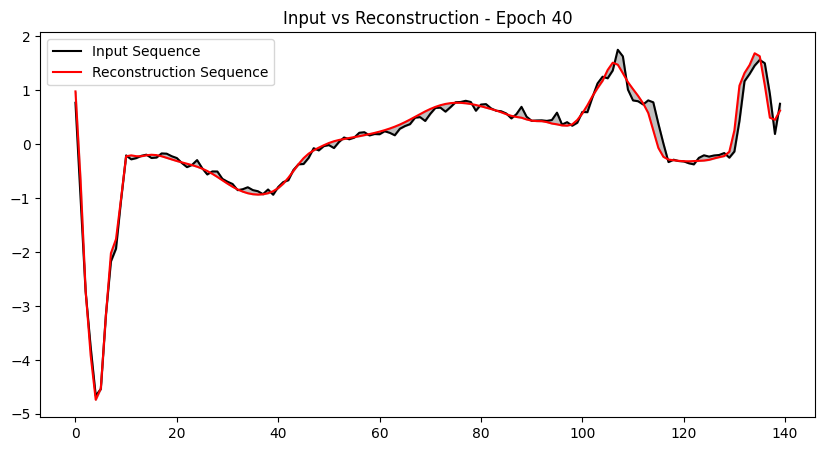

Saving best model
Epoch 41: train loss 14.96004557792144 val loss 14.45236754661534
Epoch 42: train loss 14.803634658738137 val loss 14.796431886458153
Epoch 43: train loss 14.74176194503489 val loss 17.124852001463594
Epoch 44: train loss 14.40899118345046 val loss 14.98249183661295
Epoch 45: train loss 14.540981147424773 val loss 16.159106970647088


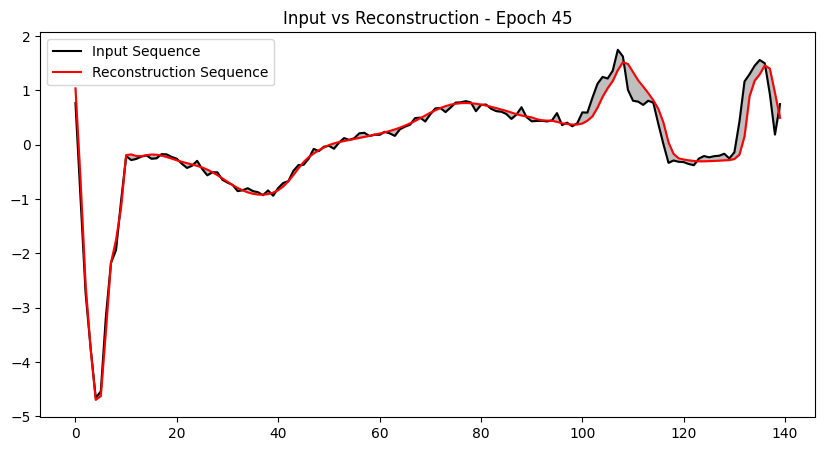

Saving best model
Epoch 46: train loss 14.200692342491411 val loss 13.920985671033632
Epoch 47: train loss 14.223011947264357 val loss 14.399837139116618
Saving best model
Epoch 48: train loss 13.565663374032479 val loss 13.78089274644038
Epoch 49: train loss 14.003175289387762 val loss 14.27261484360939
Epoch 50: train loss 13.996071654815243 val loss 14.330435918866572


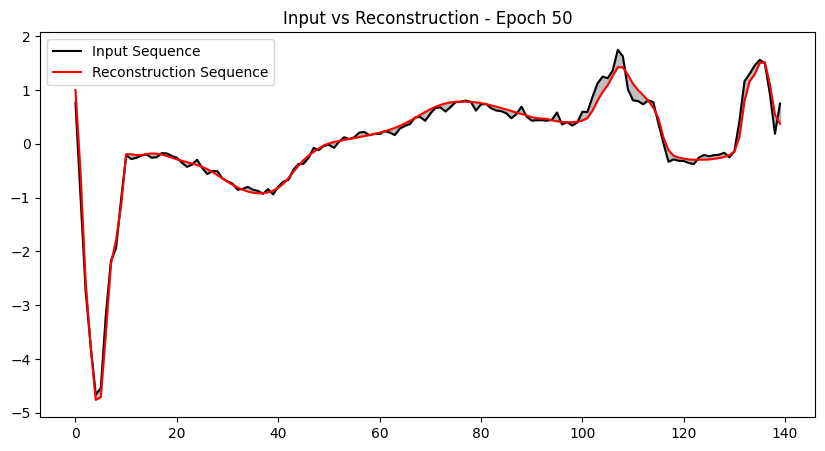

Epoch 51: train loss 13.72513575171425 val loss 14.335845625034372
Epoch 52: train loss 13.23731406856477 val loss 18.684549432565735
Epoch 53: train loss 13.722945332479112 val loss 17.311705709724297
Epoch 54: train loss 13.825759037230005 val loss 15.712185737622884
Saving best model
Epoch 55: train loss 13.3364773092612 val loss 12.795350450704529


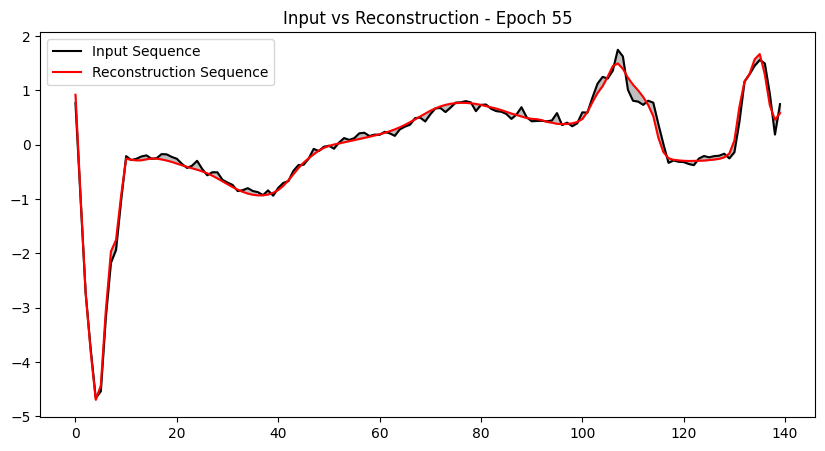

Saving best model
Epoch 56: train loss 13.343198243286858 val loss 12.493827155832545
Epoch 57: train loss 13.230901368151553 val loss 12.669475290148739
Epoch 58: train loss 13.291237147091762 val loss 13.680882846129226
Epoch 59: train loss 13.13655359040629 val loss 17.517758154624964
Epoch 60: train loss 13.195443130510077 val loss 13.947981368966477


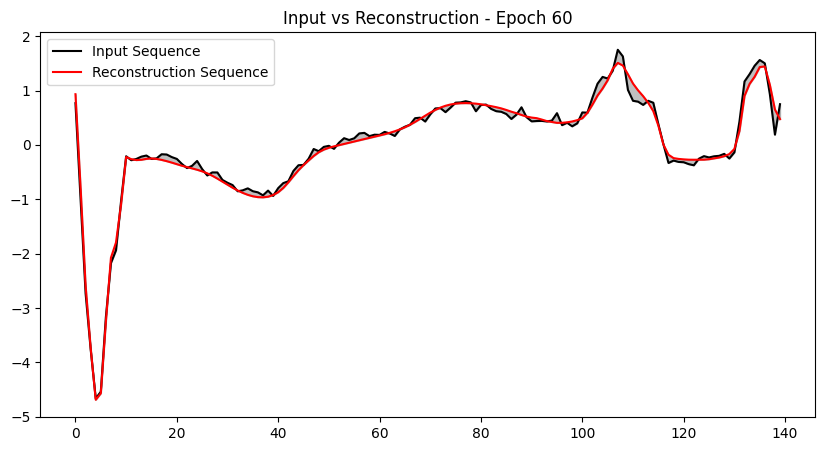

Epoch 61: train loss 13.2273518696085 val loss 15.9016304374148
Epoch 62: train loss 12.820085596240657 val loss 13.874429855737263
Epoch 63: train loss 12.652441601174726 val loss 14.094425305571573
Epoch 64: train loss 12.631234767503289 val loss 13.643057593713442
Saving best model
Epoch 65: train loss 12.912023684998665 val loss 12.254125790384442


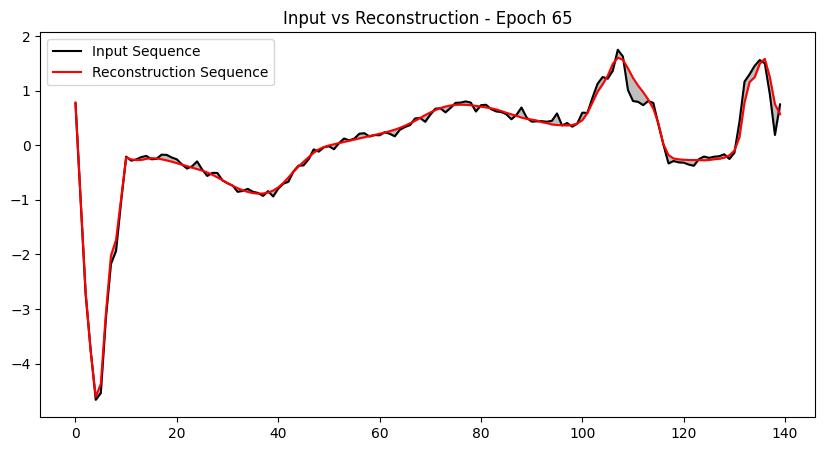

Epoch 66: train loss 12.610189691756531 val loss 14.292743793526608
Epoch 67: train loss 12.721989988175576 val loss 12.574059969736041
Epoch 68: train loss 12.713171411166023 val loss 16.71659768726232
Epoch 69: train loss 12.566780547373048 val loss 12.941486518130775
Epoch 70: train loss 12.468846523487871 val loss 15.252068093205475


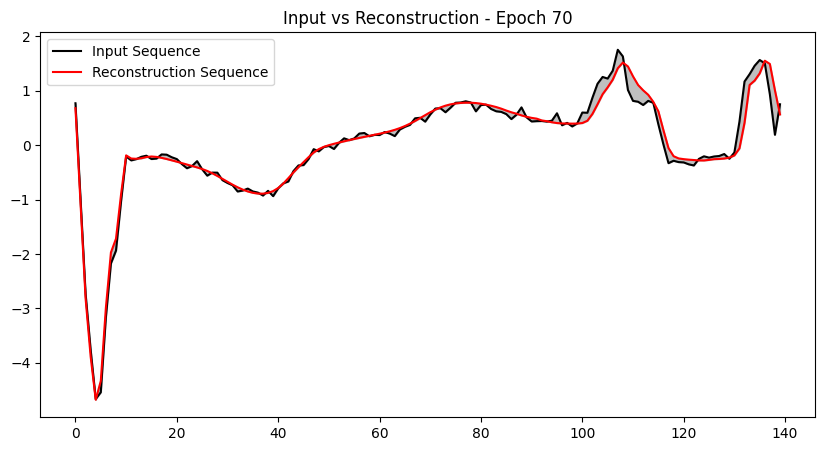

Epoch 71: train loss 12.374824533151168 val loss 15.410635482736009
Epoch 72: train loss 12.384760739965719 val loss 14.803005316151694
Saving best model
Epoch 73: train loss 12.600752985991571 val loss 12.058731926992891
Epoch 74: train loss 12.055341296021085 val loss 16.61122895589054
Epoch 75: train loss 12.176274983068955 val loss 13.10913734956813


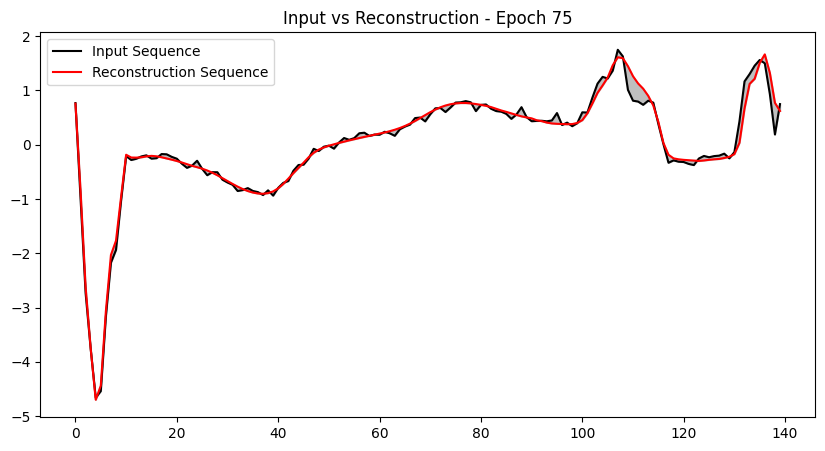

Epoch 76: train loss 12.194159177367315 val loss 13.579553578087088
Epoch 77: train loss 11.953503632920253 val loss 14.815042342749065
Epoch 78: train loss 12.069246124327544 val loss 13.43128385641469
Saving best model
Epoch 79: train loss 12.129511288700927 val loss 11.69470484346253
Saving best model
Epoch 80: train loss 12.097997574304584 val loss 11.489250762470753


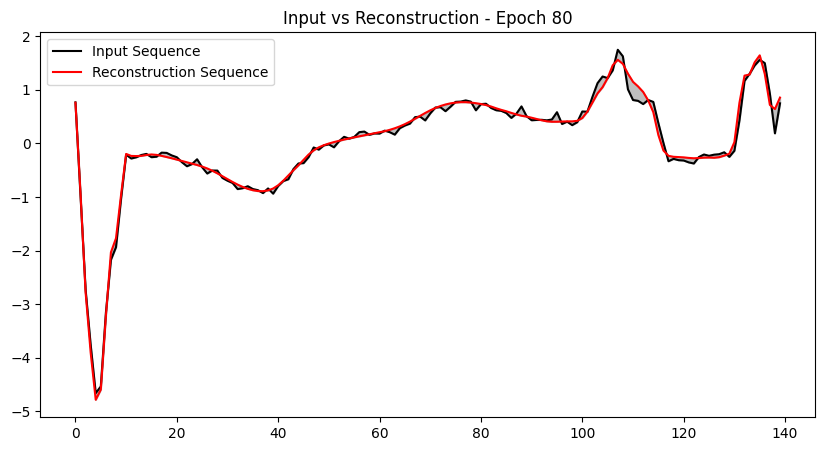

Saving best model
Epoch 81: train loss 11.879495308986359 val loss 11.465301433927777
Epoch 82: train loss 11.761858757730936 val loss 13.463037181632917
Saving best model
Epoch 83: train loss 11.92794299961722 val loss 11.260503806351801
Epoch 84: train loss 12.101552919436251 val loss 12.651762218605537
Epoch 85: train loss 11.860975684297031 val loss 12.782276109623828


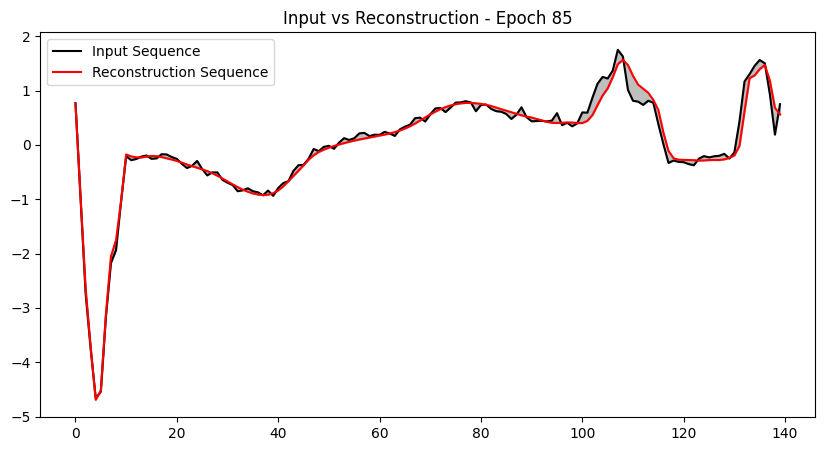

Epoch 86: train loss 11.55629626035402 val loss 11.855190259197872
Epoch 87: train loss 11.958776141500723 val loss 14.397670783280512
Saving best model
Epoch 88: train loss 11.769863694870198 val loss 10.788846020812468
Epoch 89: train loss 11.688425132124138 val loss 12.05558454298729
Epoch 90: train loss 11.840579170317767 val loss 13.001670660012412


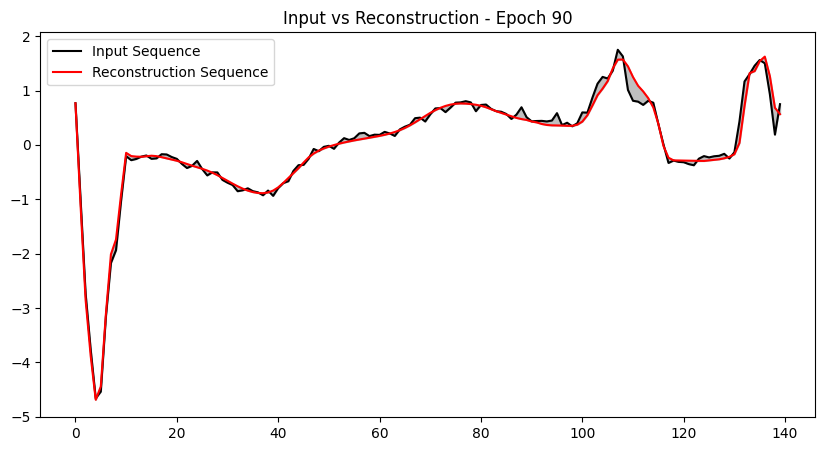

Epoch 91: train loss 11.379147316072796 val loss 14.16557610645229
Epoch 92: train loss 11.35886957567577 val loss 12.477198140206191
Epoch 93: train loss 11.575128768058326 val loss 11.866237974004127
Epoch 94: train loss 11.462176293723289 val loss 13.374486607496243
Epoch 95: train loss 11.407487117009314 val loss 13.953470433531361


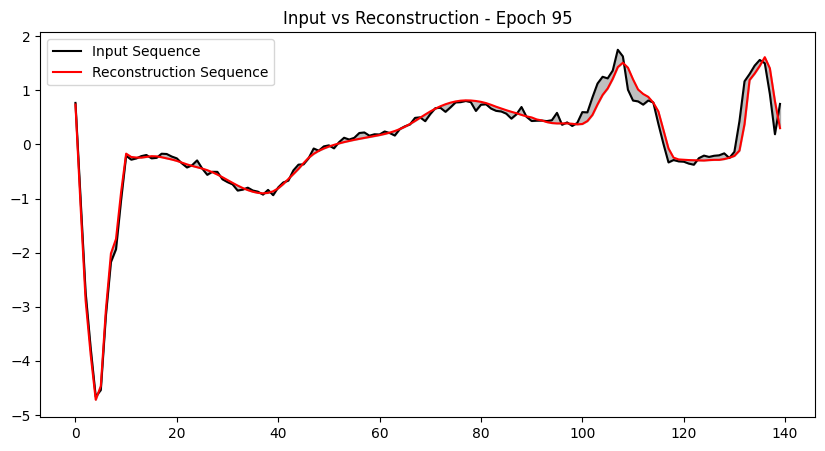

Epoch 96: train loss 11.5662217345847 val loss 12.650298790720136
Epoch 97: train loss 11.46040787844829 val loss 14.243249146197844
Epoch 98: train loss 11.257751797918637 val loss 18.622714765242748
Epoch 99: train loss 11.463439512041392 val loss 11.899884070959514
Epoch 100: train loss 11.441062980868653 val loss 11.03998043756843


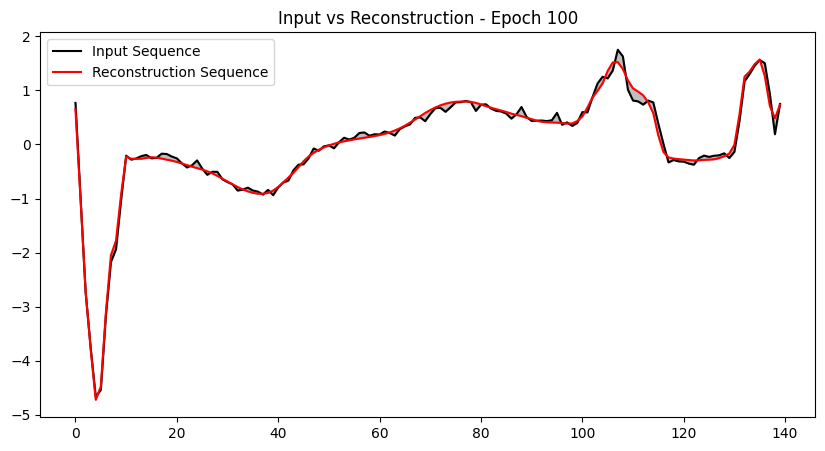

In [108]:
save_path = '/content/best_model.pth'  # Replace with your actual path
model, history = train_model(model, train_dataset, val_dataset, 100, save_path)

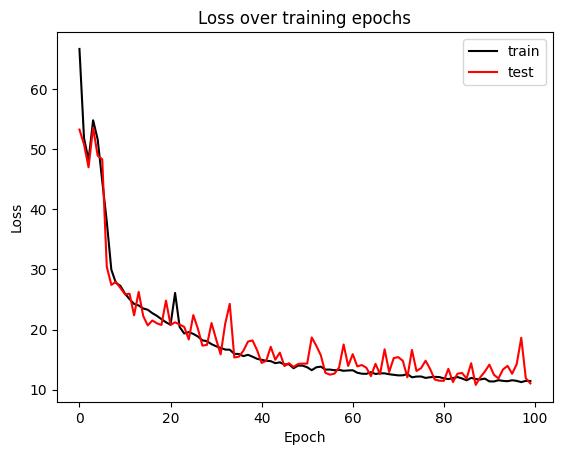

In [109]:
ax = plt.figure().gca()

ax.plot(history['train'],label='Train Loss', color='black')
ax.plot(history['val'],label='Val Loss', color='red')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

### ECG Anomaly Detection Model Evaluation and Visualization in PyTorch

The code in this section performs the evaluation and visualization stages for an ECG anomaly detection model using PyTorch. It focuses on assessing the model's ability to differentiate between normal and anomalous ECG sequences and visually representing its predictions.

1. **Model Loading and Preparation**:
    - The pre-trained Autoencoder model is loaded with its optimal weights from a saved state, ensuring it is ready for evaluation.
    - The model is transferred to the appropriate device (GPU/CPU) and set to evaluation mode.

2. **Prediction Function**:
    - `predict` is a function designed to process a dataset through the model, computing the reconstruction loss for each sequence.
    - It outputs both the reconstructed sequences and their corresponding losses, which are crucial metrics for evaluating the model's performance.

3. **Loss Distribution Visualization**:
    - The reconstruction losses for the training dataset are visualized using a distribution plot, providing insight into the model's performance during training.
    - A threshold (25 in this case) is set to differentiate between normal and anomalous readings based on the loss.

4. **Model Performance on Test Data**:
    - The model's effectiveness is tested on a 'normal' test dataset, with the distribution of reconstruction losses plotted. This helps in understanding how the model performs on unseen but normal ECG data.
    - The number of correctly identified normal sequences is calculated and displayed, offering a quantitative measure of performance.

5. **Anomaly Detection and Visualization**:
    - The model is then evaluated on an 'anomaly' dataset to test its ability to identify anomalies.
    - A distribution plot for the losses on the anomaly dataset is created, with anomalies expected to have higher reconstruction losses.
    - The number of correctly identified anomalies is calculated, providing a metric for the model's sensitivity to abnormalities.

6. **Individual Predictions Visualization**:
    - `plot_prediction` is a function that visualizes the original and reconstructed ECG sequences, along with their reconstruction loss. This visualization is instrumental in understanding the model's performance on an individual sequence level.
    - The script creates a series of plots for both normal and anomalous ECG sequences from the test datasets, allowing for a direct visual comparison of the model's predictions against the actual data.

This comprehensive evaluation and visualization approach enables a thorough understanding of the model's capabilities and limitations in real-world scenarios. It offers an in-depth analysis of how effectively the model can identify and distinguish between normal and anomalous ECG patterns, which is critical for its application in healthcare monitoring systems.

In [123]:
model = Autoencoder(seq_len, n_features, 128)

model.load_state_dict(torch.load('/content/best_model.pth'))

model = model.to(device)
model.eval()

Autoencoder(
  (encoder): Encoder(
    (rnn1): LSTM(1, 256, batch_first=True)
    (rnn2): LSTM(256, 128, batch_first=True)
  )
  (decoder): Decoder(
    (rnn1): LSTM(128, 128, batch_first=True)
    (rnn2): LSTM(128, 256, batch_first=True)
    (output_layer): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [124]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses


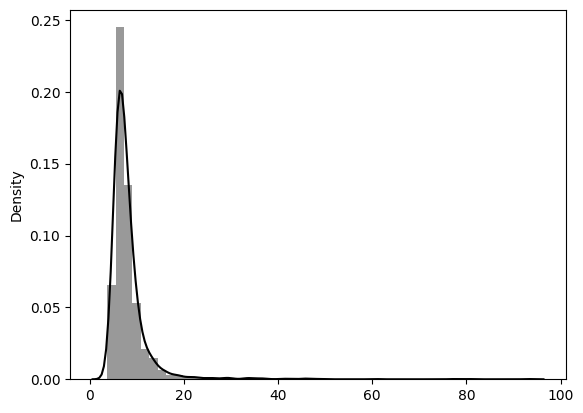

In [125]:
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True, label='Train',color='black');

#Visualising train loss

In [126]:
Threshold = 25

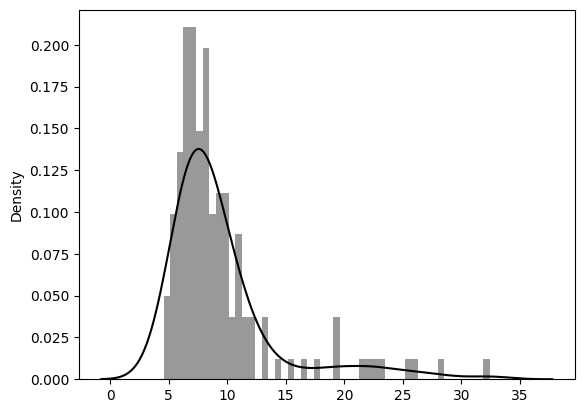

In [127]:
predictions, pred_losses = predict(model, test_normal_dataset)
sns.distplot(pred_losses, bins=50, kde=True,color='black');

In [128]:
correct = sum(l <= 25 for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_normal_dataset)}')

Correct normal predictions: 141/145


In [129]:
anomaly_dataset = test_anomaly_dataset[:len(test_normal_dataset)]


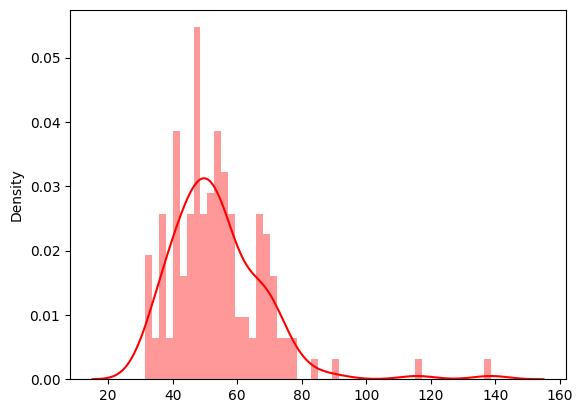

In [130]:
predictions, pred_losses = predict(model, anomaly_dataset)
sns.distplot(pred_losses, bins=50, kde=True,color='red');


In [131]:
correct = sum(l > 25 for l in pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anomaly_dataset)}')

Correct anomaly predictions: 145/145


In [132]:
def plot_prediction(data, model, title, ax):
  predictions, pred_losses = predict(model, [data])

  ax.plot(data, label='true',color='black')
  ax.plot(predictions[0], label='reconstructed',color='red')
  ax.set_title(f'{title} (loss: {np.around(pred_losses[0], 2)})')
  ax.legend()

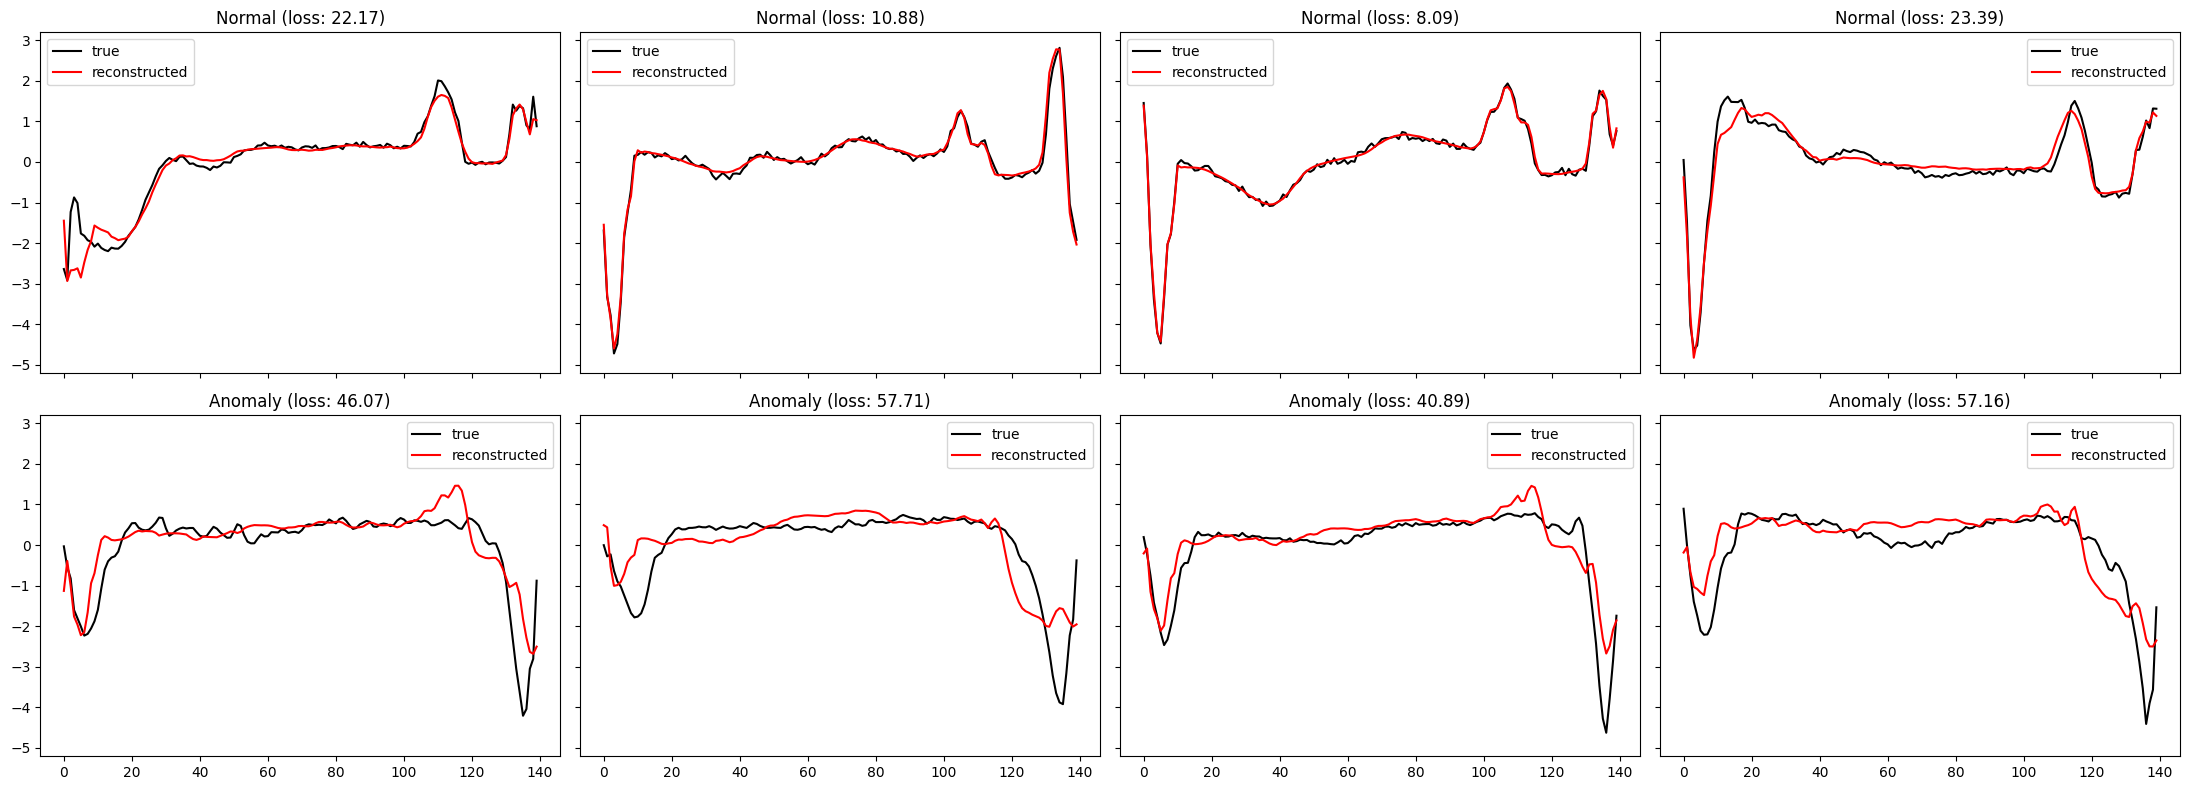

In [133]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=4,
  sharey=True,
  sharex=True,
  figsize=(22, 8)
)

for i, data in enumerate(test_normal_dataset[:4]):
  plot_prediction(data, model, title='Normal', ax=axs[0, i])

for i, data in enumerate(test_anomaly_dataset[:4]):
  plot_prediction(data, model, title='Anomaly', ax=axs[1, i])

fig.tight_layout();